In [6]:
import utils
import numpy as np


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def region_growing(im: np.ndarray, seed_points: list, T: int) -> np.ndarray:
    """
    A region growing algorithm that segments an image into 1 or 0 (True or False).
    Finds candidate pixels with a Moore-neighborhood (8-connectedness).
    Uses pixel intensity thresholding with the threshold T as the homogeneity criteria.
    The function takes in a grayscale image and outputs a boolean image

    args:
        im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        seed_points: list of list containing seed points (row, col). Ex:
            [[row1, col1], [row2, col2], ...]
        T: integer value defining the threshold to used for the homogeneity criteria.
    return:
        (np.ndarray) of shape (H, W). dtype=bool
    """
    
    ## Function to check if a point is within the image boundaries
    def within_bounds(location, shape):
        return 0 <= location[0] < shape[0] and 0 <= location[1] < shape[1]

    ## Check if current pixel values within the threshold
    def intensity_within_threshold(current_intensity, seed_intensity ):
        return abs(current_intensity - seed_intensity) <= T

    ## Find the 8 neighbors surrounding the point
    def find_neighbors(current_point_x, current_point_y):
        neighbors = [
            (current_point_x - 1, current_point_y), ## left of the point
            (current_point_x - 1, current_point_y- 1), ## below and to the left
            (current_point_x + 1, current_point_y - 1), ## above and to the left
            (current_point_x+ 1, current_point_y), ## right of the point
            (current_point_x - 1, current_point_y + 1), ## below and to the right
            (current_point_x + 1, current_point_y + 1), ## above and to the right
            (current_point_x, current_point_y - 1), ## below the current point
            (current_point_x, current_point_y + 1), ## above the current point
        ]
        return neighbors

    ## Initialize an empty boolean array for the segmented image
    segmented = np.zeros_like(im, dtype=bool)
    im = im.astype(float)

    ## Iterate over each seed point
    for seed_point in seed_points:
        queue = [seed_point]
        seed_intensity = im[seed_point[0], seed_point[1]]

        ## perform region growing with all seeds in the queue
        while len(queue) > 0:
            ## Update the queue by popping the first element
            current_point = queue.pop(0)

            ## Check if point is within bounds and not already segmented
            if not within_bounds(current_point, im.shape) or segmented[current_point[0], current_point[1]]:
                continue

            ## Get current points intensity value
            current_value = im[current_point[0], current_point[1]]
            
            if intensity_within_threshold(current_value, seed_intensity):
                # Mark the current point as part of the region
                segmented[current_point[0], current_point[1]] = True
                neighbors = find_neighbors(current_point[0], current_point[1])
                
                ## Add valid neighbors to the queue
                for neighbor in neighbors:
                    if within_bounds(neighbor, im.shape):
                        queue.append(neighbor)
                        
    ## Display the segmented image (consider removing this line for better flexibility)
    plt.imshow(segmented, cmap="gray")

    return segmented


Reading image: images/defective-weld.png
Saving image to: image_processed/defective-weld-segmented.png


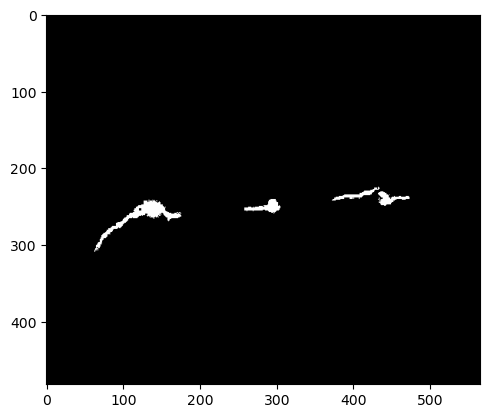

In [8]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("defective-weld.png")

    seed_points = [ # (row, column)
        [254, 138], # Seed point 1
        [253, 296], # Seed point 2
        [233, 436], # Seed point 3
        [232, 417], # Seed point 4
    ]
    intensity_threshold = 50
    segmented_image = region_growing(im, seed_points, intensity_threshold)

    assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
        im.shape, segmented_image.shape)
    assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
            segmented_image.dtype)

    segmented_image = utils.to_uint8(segmented_image)
    utils.save_im("defective-weld-segmented.png", segmented_image)